# Bibliotecas 

In [4]:
!pip install statsmodels

In [7]:
# Importa as bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [27]:
# Busca os preços de fechamento
ticker = ['PETR3.SA', 'PETR4.SA']
start = '2022-01-01'
end = '2024-06-10'

prices =  yf.download(ticker, start = start, end = end)['Close'].dropna()
prices

[*********************100%%**********************]  2 of 2 completed


Ticker,PETR3.SA,PETR4.SA
Date,,
2022-01-03,31.520000,29.090000
2022-01-04,31.920000,29.200001
2022-01-05,30.610001,28.070000
2022-01-06,30.580000,28.049999
2022-01-07,30.830000,28.180000
...,...,...
2024-06-03,40.250000,38.580002
2024-06-04,40.020000,38.150002
2024-06-05,39.950001,38.200001


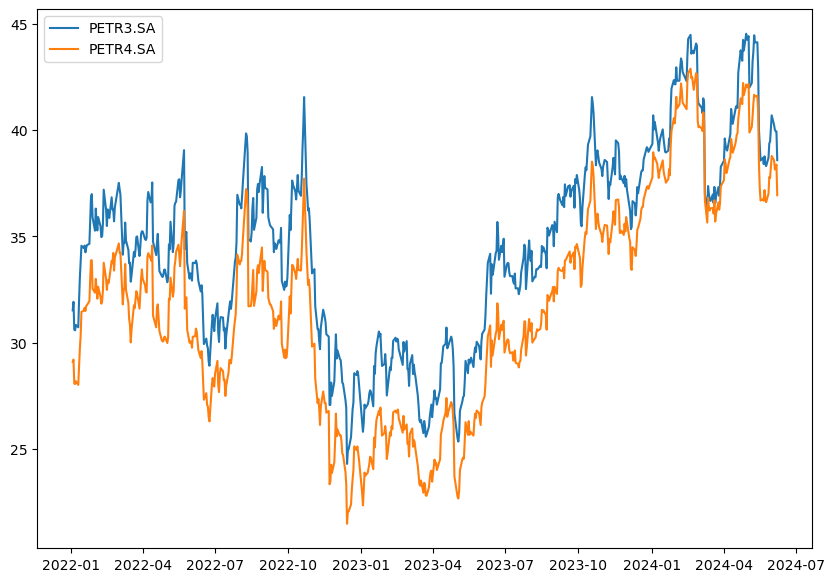

In [28]:
# Verifica o comportamento das duas séries
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(prices.index, prices["PETR3.SA"], label = "PETR3.SA")
ax.plot(prices.index, prices["PETR4.SA"], label = "PETR4.SA")
plt.legend()
plt.show()

In [29]:
# Salva a série de preços e dois objetos diferentes
petr3 = prices[['PETR3.SA']]

petr4 = prices[['PETR4.SA']]

In [30]:
# Realiza o teste de cointegração
score, pvalue, _ = coint(petr3, petr4, maxlag = 1)
print(' Teste p-valor da Cointegração ' + str(pvalue))

 Teste p-valor da Cointegração 0.006431519538578157


In [31]:
# Adiciona a constante
const_petr3 = sm.add_constant(petr3)

# Roda a regressão
results_reg = sm.OLS(petr4, const_petr3).fit()

# Transforma em série
petr3 = prices['PETR3.SA']
petr4 = prices['PETR4.SA']

# Calcula o spread
b = results_reg.params['PETR3.SA']

spread = petr4 - (b * petr3)

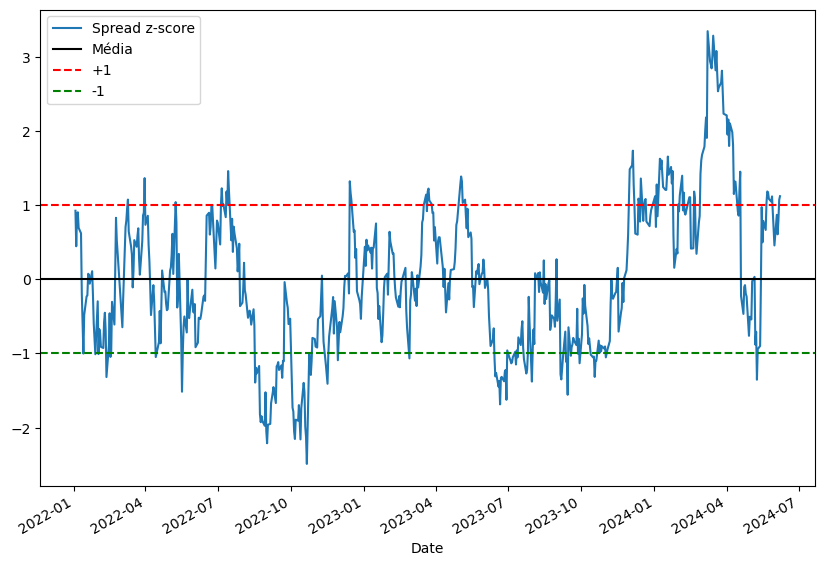

In [32]:
# Cria a função para calcular o z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

# Plota o z-score
spread_z = zscore(spread)
spread_z.plot(figsize=(10,7))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Média', '+1', '-1']);